资料:[Seaborn(sns)官方文档学习笔记（第六章 绘制数据网格）
](https://zhuanlan.zhihu.com/p/27816821)  

数据可视化

数据可视化可以更加直观的看清楚特征的各种表现,帮助我们筛选/找出重要特征/规则.这里以DF平台上平安产险数据建模大赛 驾驶行为预测驾驶风险的数据为例 数据在data目录里 链接为:[2018平安产险数据建模大赛 驾驶行为预测驾驶风险 ](http://www.datafountain.cn/?u=7610684&&#/competitions/284/intro)

常用的可视化工具为  matplotlib和 seaborn  pandas本身也自带画图工具,这几个是平时用得最多的画图工具

In [14]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [3]:
df=pd.DataFrame(pd.read_csv("data/PINGAN-2018-train_demo.csv",header=0))

In [7]:
def dealY(x):  #把Y处理成 二分类
    if x>0:
        return 1
    else:
        return 0

In [8]:
df["YY"]=df.Y.map(lambda x:dealY(x))

### 箱形图

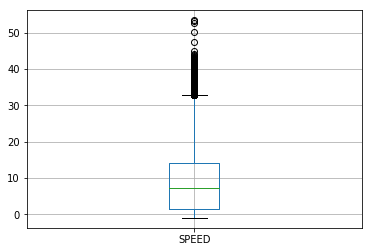

In [4]:
df.boxplot(column=['SPEED'])

又叫箱线图（Boxplot）也称箱须图（Box-whisker Plot），是利用数据中的五个统计量：最小值、第一四分位数、中位数、第三四分位数与最大值来描述数据的一种方法，它也可以粗略地看出数据是否具有有对称性，分布的分散程度等信息，特别可以用于对几个样本的比较。
上下两条线为异常值截断点.  资料:[箱线图](http://wiki.mbalib.com/wiki/%E7%AE%B1%E7%BA%BF%E5%9B%BE)

### pairplot

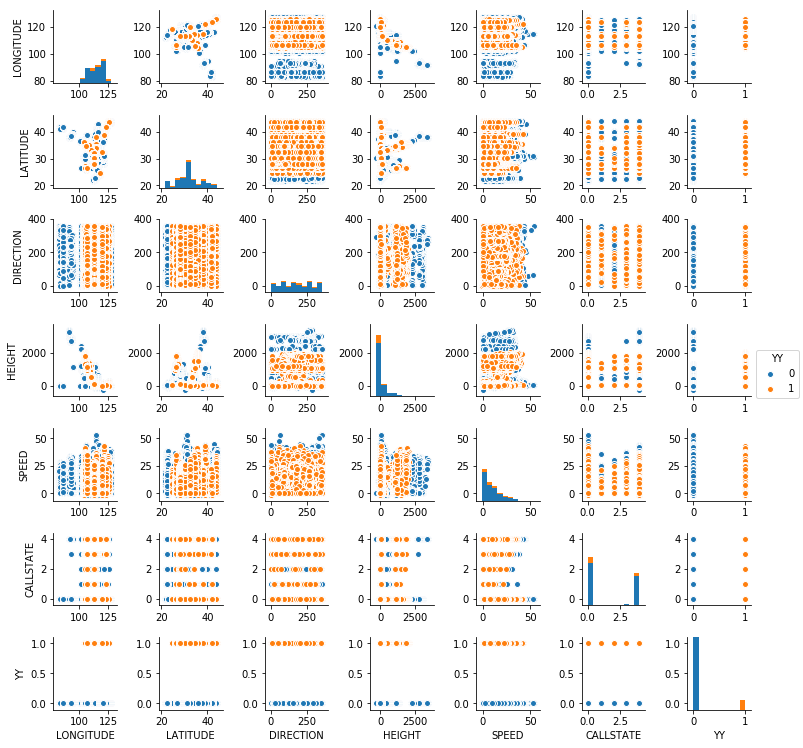

In [9]:
columns=['LONGITUDE', 'LATITUDE', 'DIRECTION', 'HEIGHT',
       'SPEED', 'CALLSTATE',"YY"]
sns.pairplot(df[columns],hue='YY',size=1.5);

pairplot 可以很好的显示出 特征与特征组合对结果的影响

### 特征相关度分析

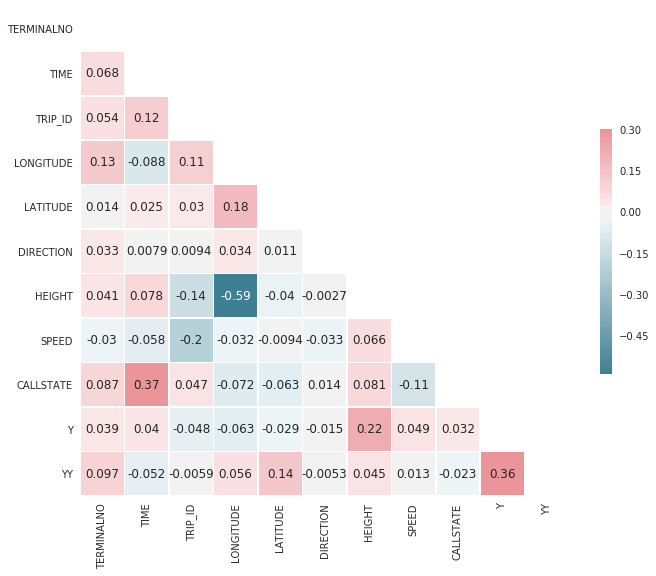

In [10]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

可以看出特征相关性,用于特征组合筛选

### 数量图

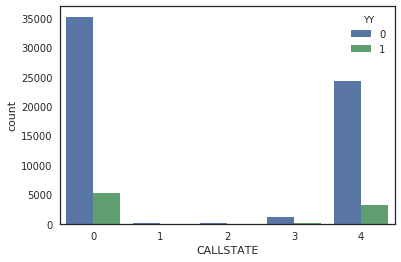

In [11]:
sns.countplot(x="CALLSTATE",hue='YY',data=df);

显示每个取值的特征取值数量条形图

### 混淆矩阵

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

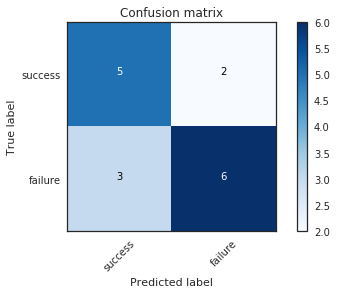

In [17]:
from sklearn.metrics import confusion_matrix
class_name=['success','failure']
true=[1,0,1,0,0,1,0,1,0,1,1,1,1,0,0,1]
pre =[1,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0]
cm=confusion_matrix(true,pre)
plot_confusion_matrix(cm,class_name)

### ROC曲线

In [83]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=1200,n_features=5,n_classes=2)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [84]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

In [85]:
LR.score(x_test,y_test)

0.90833333333333333

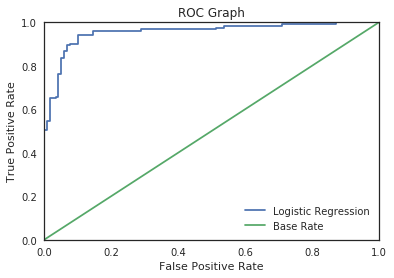

In [86]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1],[0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()